In [9]:
import math
import matplotlib.pyplot as plt
import numpy as np
from typing import Tuple

In [10]:
# Define the normal CDF function
def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

In [11]:
# Inverse of the normal CDF:
def inverse_normal_cdf(p: float, 
                       mu: float = 0, 
                       sigma: float = 1, 
                       tolerance: float = 0.00001) -> float:
    """ Find approximate inverse using binary search """

    # If not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    
    low_z = -10.0   # normal_cdf(-10) is very close to 0
    hi_z = 10.0     # normal_cdf(10) is very close to 1

    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2          # Consider the midpoint
        mid_p = normal_cdf(mid_z)           # and the CDF's value there
        if mid_p < p:
            low_z = mid_z                   # Midpoint too low, search above it
        else:
            hi_z = mid_z                    # Midpoint too high, search below it

    return mid_z

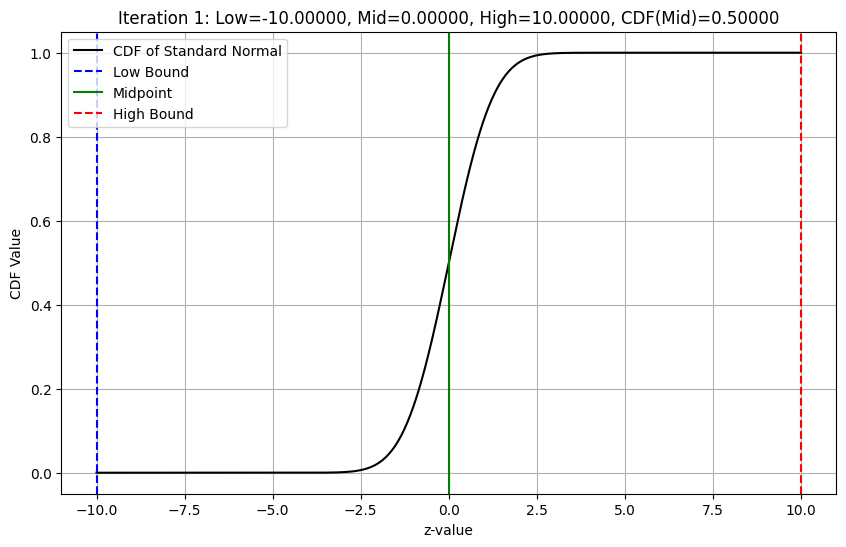

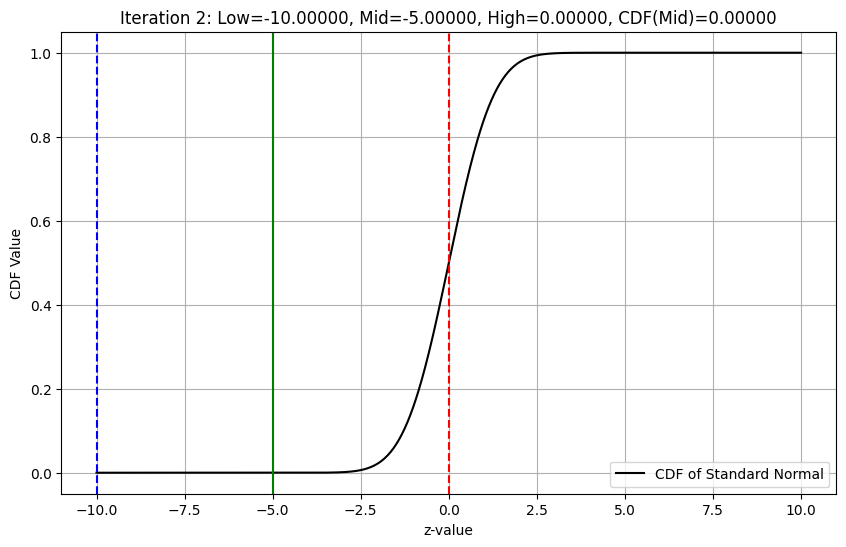

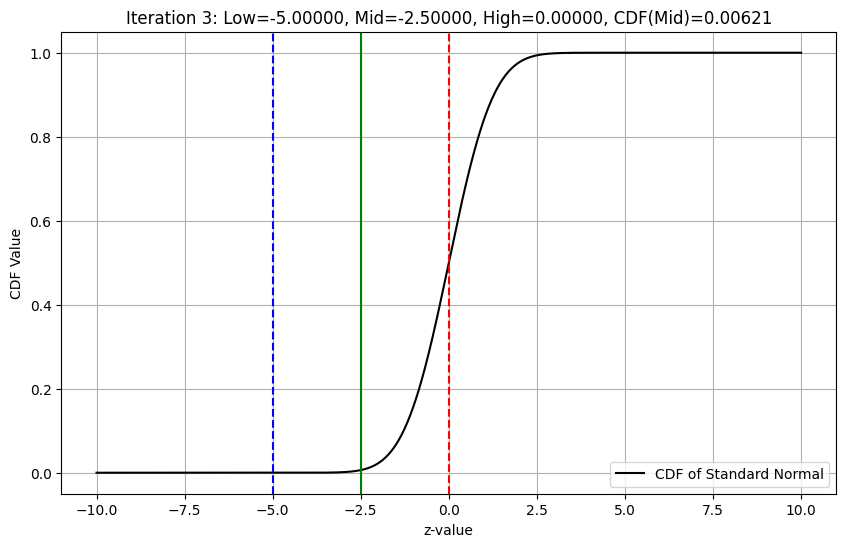

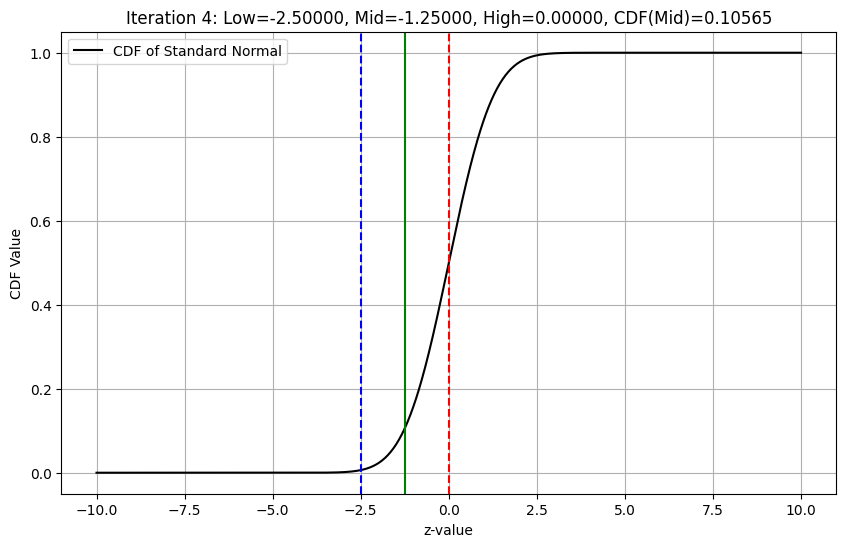

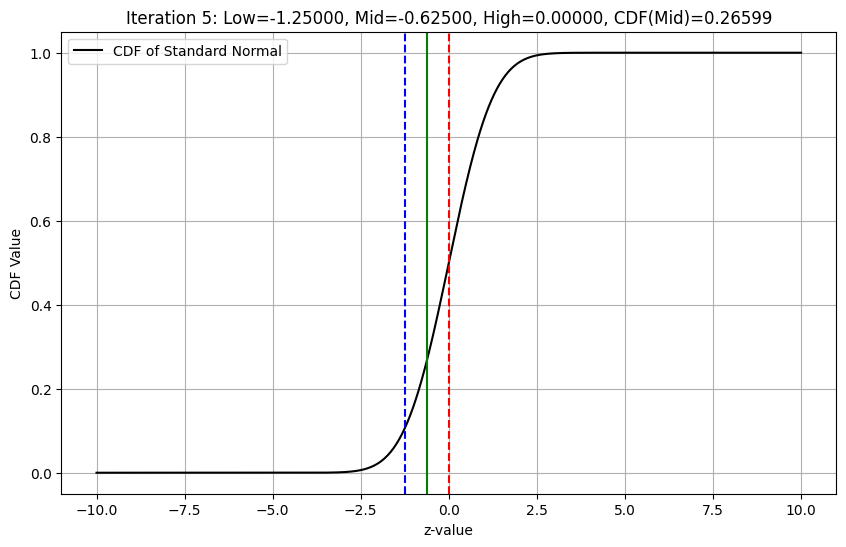

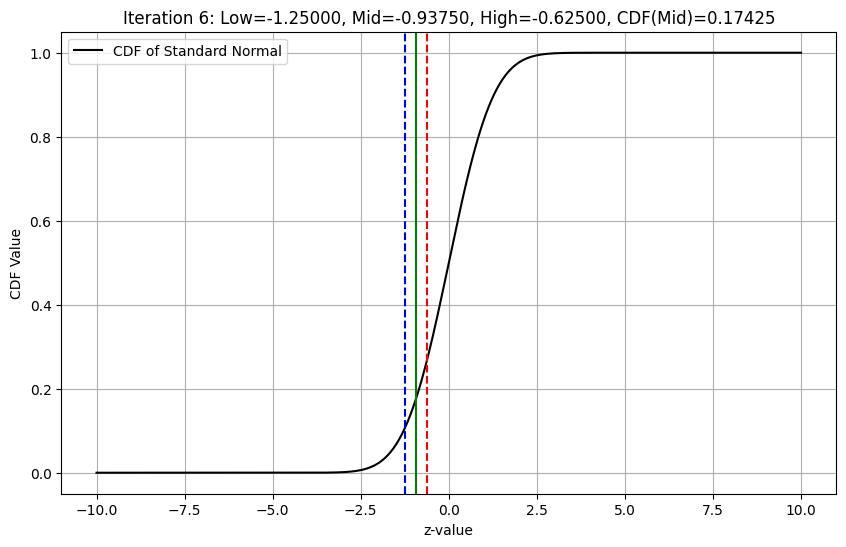

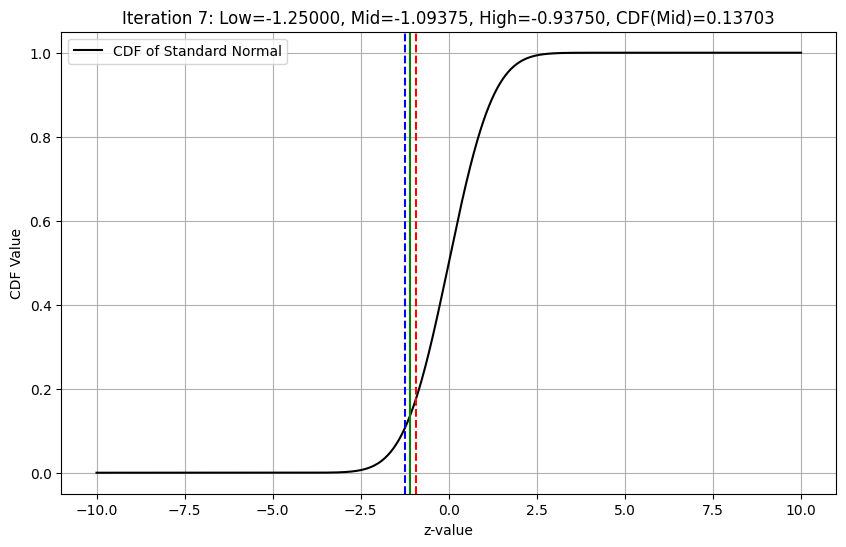

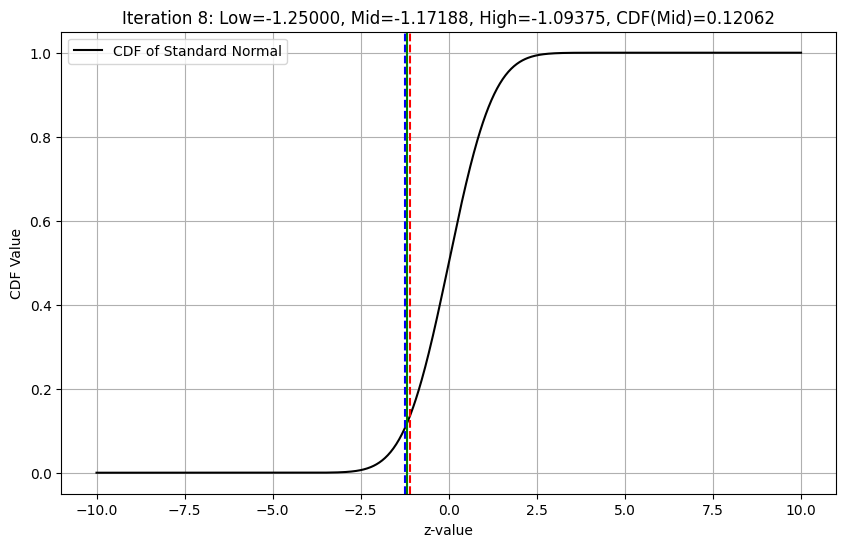

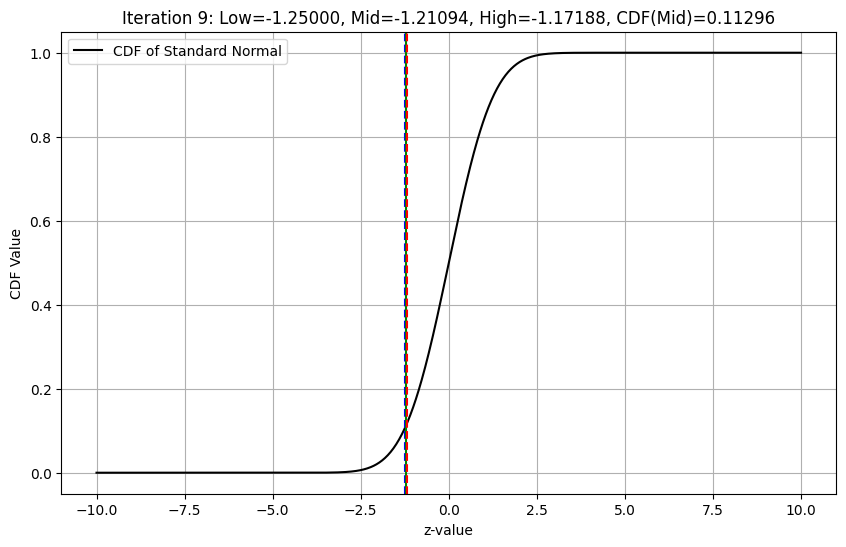

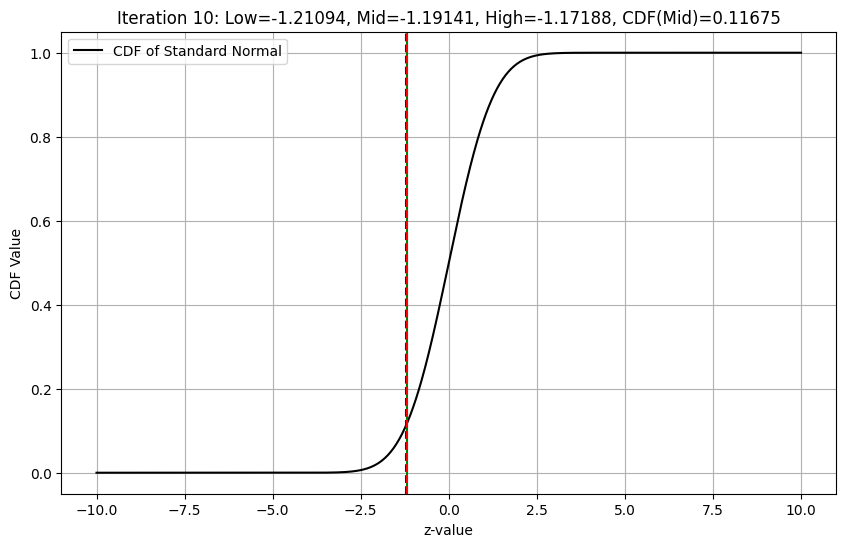

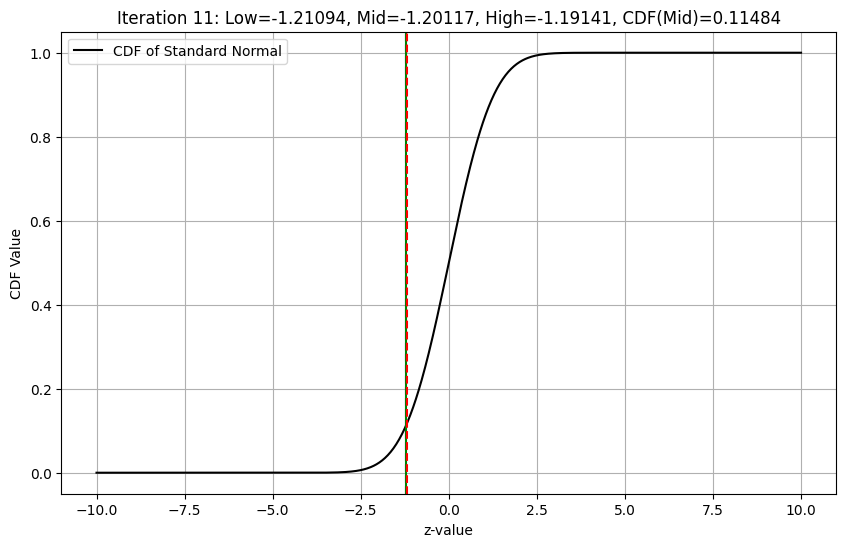

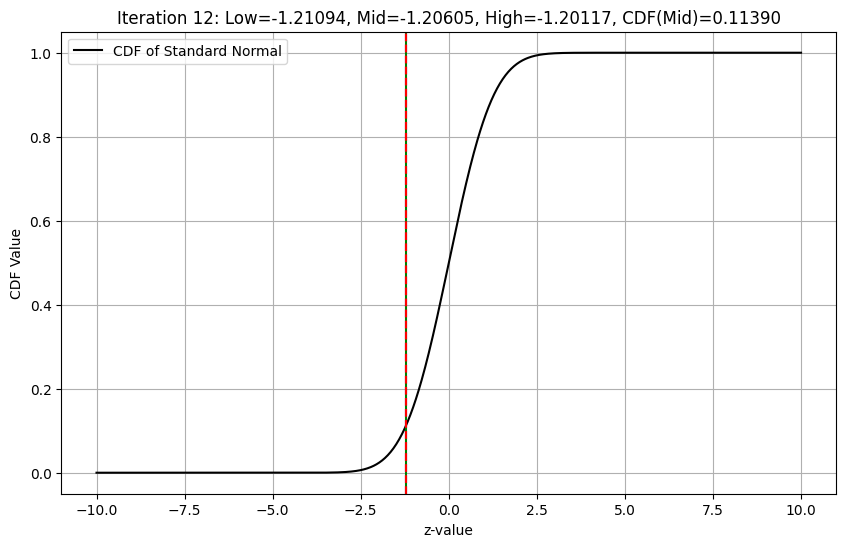

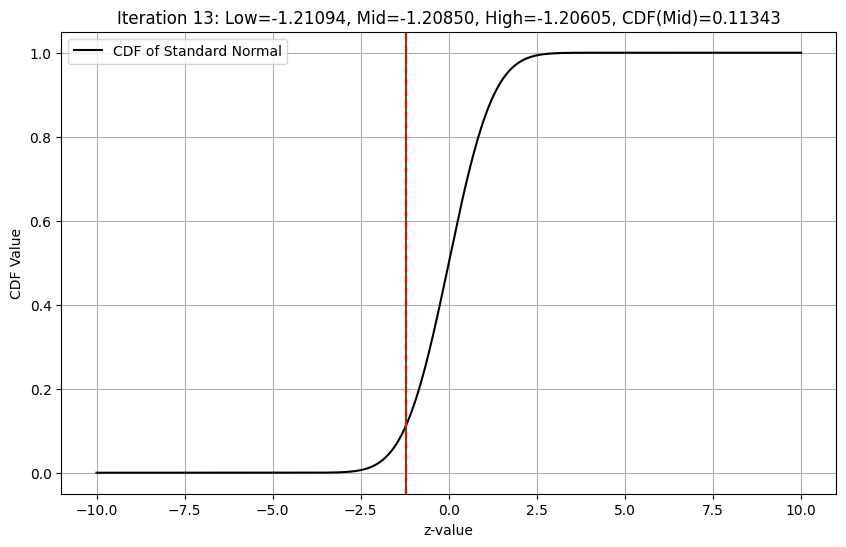

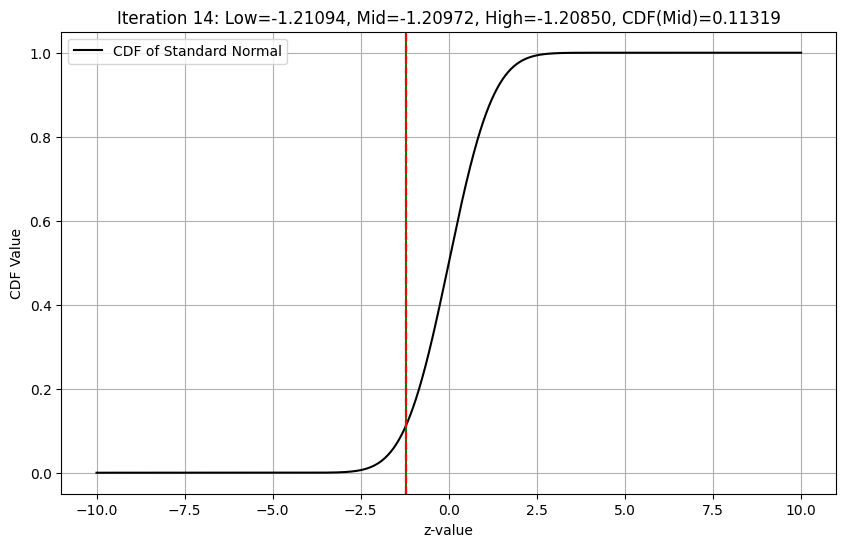

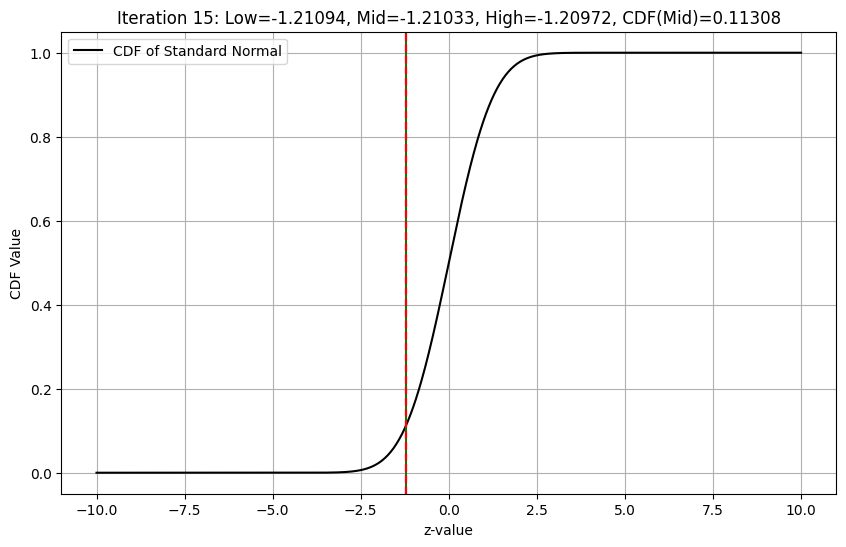

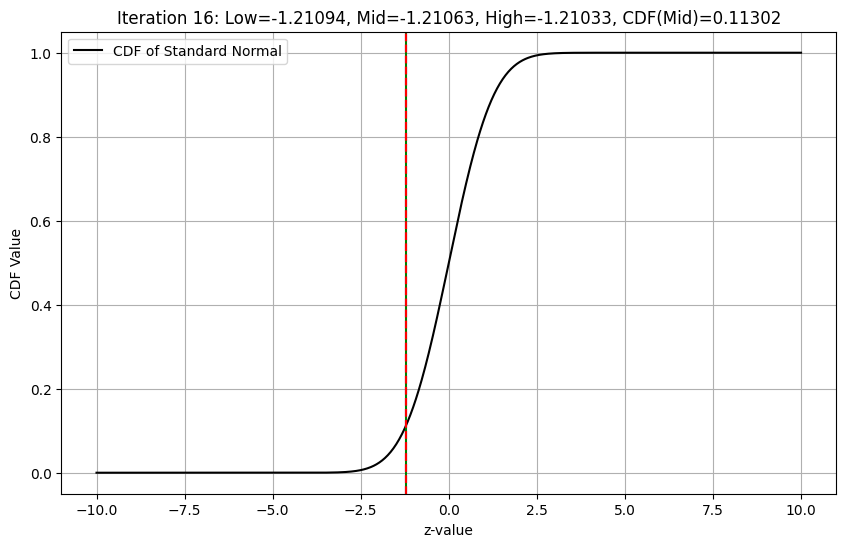

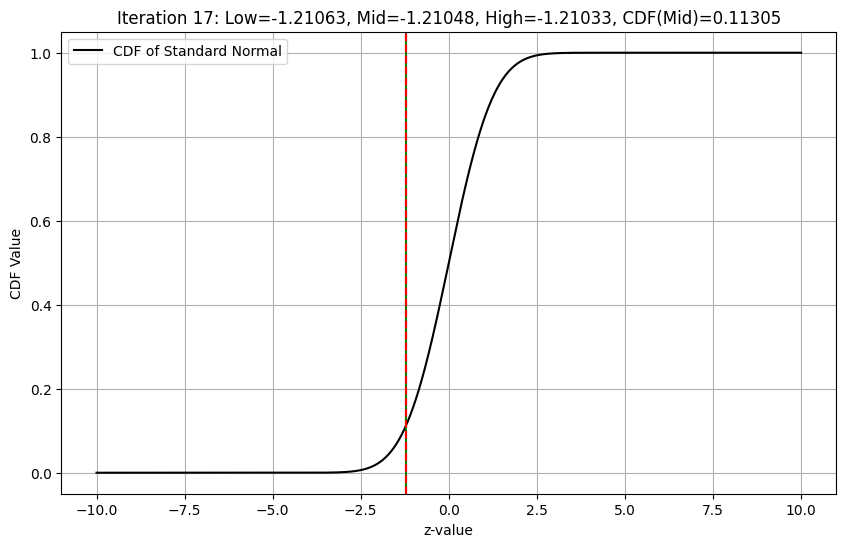

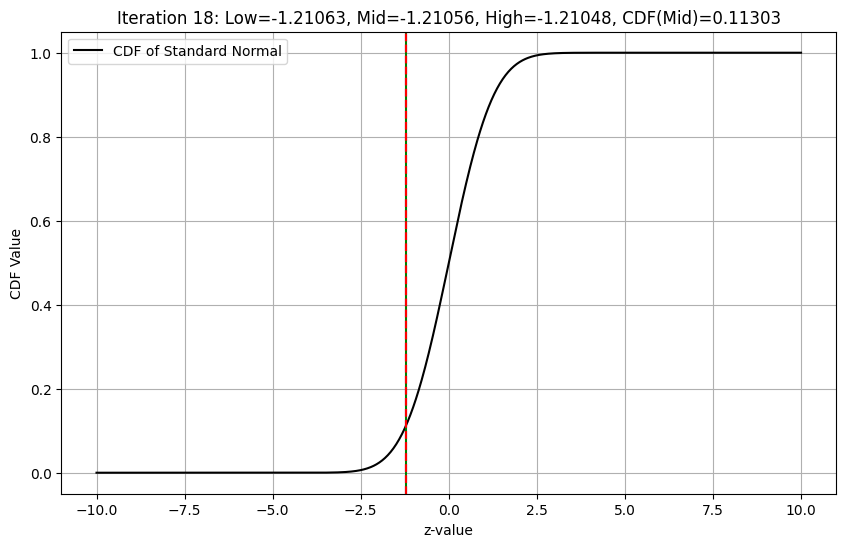

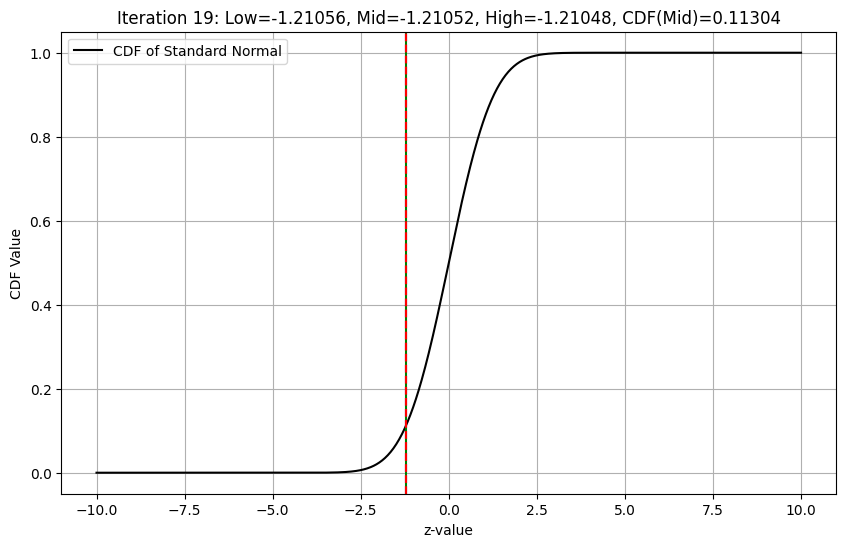

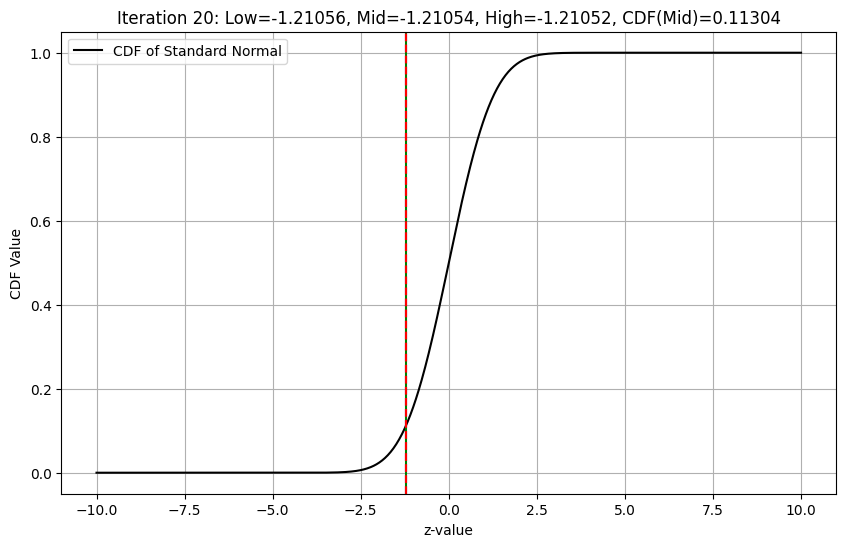

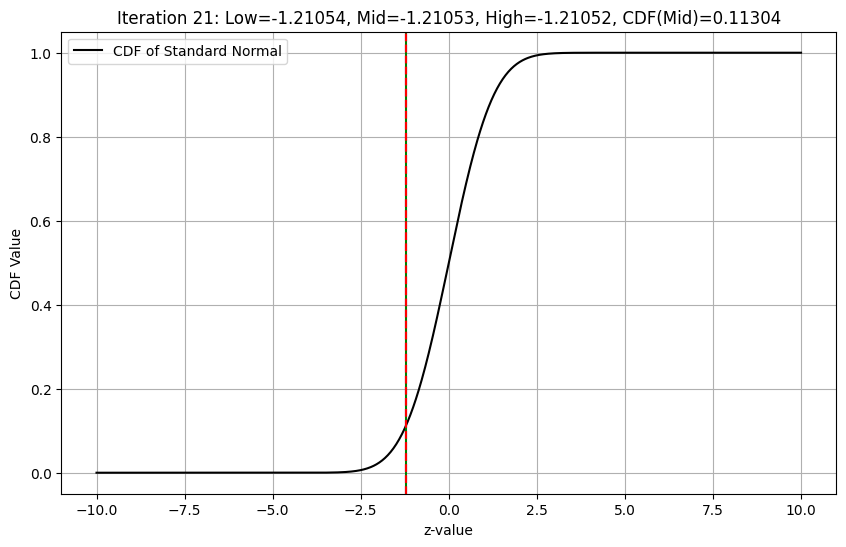

z-value for p=0.113039 is approximately -1.21053


In [12]:
# Initialize parameters
mu = 88           # Mean
sigma = 19        # Standard deviation
p = 0.113039         # Target probability
tolerance = 0.00001

low_z = -10.0     # Starting lower bound
hi_z = 10.0       # Starting upper bound
steps = []        # List to store the bounds and midpoint at each step

# Perform binary search step by step and save details
while hi_z - low_z > tolerance:
    mid_z = (low_z + hi_z) / 2  # Midpoint
    mid_p = normal_cdf(mid_z)   # CDF at midpoint
    steps.append((low_z, mid_z, hi_z, mid_p))  # Record step details

    # Update bounds based on the CDF value
    if mid_p < p:  # Compare to target probability
        low_z = mid_z
    else:
        hi_z = mid_z

# Visualize each step in the binary search process
for i, (low, mid, high, mid_p) in enumerate(steps):
    # Create x values for visualization of the normal curve
    x_values = np.linspace(-10, 10, 1000)
    y_values = [normal_cdf(x) for x in x_values]

    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, label='CDF of Standard Normal', color='black')
    plt.axvline(x=low, color='blue', linestyle='--', label='Low Bound' if i == 0 else None)
    plt.axvline(x=mid, color='green', linestyle='-', label='Midpoint' if i == 0 else None)
    plt.axvline(x=high, color='red', linestyle='--', label='High Bound' if i == 0 else None)
    plt.title(f'Iteration {i + 1}: Low={low:.5f}, Mid={mid:.5f}, High={high:.5f}, CDF(Mid)={mid_p:.5f}')
    plt.xlabel('z-value')
    plt.ylabel('CDF Value')
    plt.legend()
    plt.grid()
    plt.show()

# Print the final result
print(f'z-value for p={p} is approximately {mid_z:.5f}')

In [13]:
# The normal cdf _is_ the probability the variable is below a threshold
normal_probability_below = normal_cdf

# It's above the threshold if it's not below the threshold
def normal_probability_above(lo: float,
    mu: float = 0,
    sigma: float = 1) -> float:
    """The probability that an N(mu, sigma) is greater than lo."""
    return 1 - normal_cdf(lo, mu, sigma)

# It's between if it's less than hi, but not less than lo
def normal_probability_between(lo: float,
    hi: float,
    mu: float = 0,
    sigma: float = 1) -> float:
    """The probability that an N(mu, sigma) is between lo and hi."""
    return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)

# It's outside if it's not between
def normal_probability_outside(lo: float,
    hi: float,
    mu: float = 0,
    sigma: float = 1) -> float:
    """The probability that an N(mu, sigma) is not between lo and hi."""
    return 1 - normal_probability_between(lo, hi, mu, sigma)

print(normal_probability_between(469,531,550,15.7))

0.11310266552601672


In [14]:
def normal_upper_bound(probability: float,
    mu: float = 0,
    sigma: float = 1) -> float:
    """Returns the z for which P(Z <= z) = probability"""
    return inverse_normal_cdf(probability, mu, sigma)

def normal_lower_bound(probability: float,
    mu: float = 0,
    sigma: float = 1) -> float:
    """Returns the z for which P(Z >= z) = probability"""
    return inverse_normal_cdf(1 - probability, mu, sigma)

def normal_two_sided_bounds(probability: float,
    mu: float = 0,
    sigma: float = 1) -> Tuple[float, float]:
    """
    Returns the symmetric (about the mean) bounds
    that contain the specified probability
    """
    tail_probability = (1 - probability) / 2
    # upper bound should have tail_probability above it
    upper_bound = normal_lower_bound(tail_probability, mu, sigma)
    # lower bound should have tail_probability below it
    lower_bound = normal_upper_bound(tail_probability, mu, sigma)
    return lower_bound, upper_bound

lower_bound, upper_bound = normal_two_sided_bounds(0.95, 500, 15.8)
print(f'Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}')

Lower bound: 469.03, Upper bound: 530.97
